## 1.  Fundamental
It is used to estimate real values (cost of houses, number of calls, total sales etc.) based on continuous variable(s). Here, we **establish relationship** between **independent** and **dependent variables** by **fitting a best line**. This best fit line is known as regression line and represented by a linear equation

$$Y= a\cdot X + b\tag{1.1}$$

*The best way to understand linear regression is to relive this experience of childhood. Let us say, you ask a child in fifth grade to arrange people in his class by increasing order of weight, without asking them their weights! What do you think the child will do? He/she would likely look (visually analyze) at the height and build of people and arrange them using a combination of these visible parameters. This is linear regression in real life! The child has actually figured out that height and build would be correlated to the weight by a relationship, which looks like the equation above.*

In equation (1.1):

- $Y$ – Dependent Variable
- $a$ – Slope/Coefficient
- $X$ – Independent variable
- $b$ – Intercept/Bias

These coefficients $a$ and $b$ are derived based on **minimizing the sum of squared difference of distance** between data points $Y$ and regression line $\hat{Y}$:

$$\sum(\hat{Y}-Y)^2\tag{1.2}$$

Look at the below example. Here we have identified the best fit line having linear equation $y=0.2811x+13.9$. Now using this equation, we can find the weight, knowing the height of a person.
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/Linear_Regression.png)

Linear Regression is of mainly two types: **Simple** Linear Regression and **Multiple** Linear Regression. Simple Linear Regression is characterized by **one independent** variable. And, Multiple Linear Regression(as the name suggests) is characterized by **multiple** (more than 1) **independent** variables. While finding best fit line, you can fit a polynomial or curvilinear regression. And these are known as polynomial or curvilinear regression.

## 2. Simple Linear Regression Example
### Prepare libraries & tools

In [3]:
# Import model from library
from sklearn import linear_model
# import metric to evaluate the model
from sklearn.metrics import mean_squared_error
# import tool to split given data into train 
from sklearn.model_selection import train_test_split

### Prepare data

In [17]:
# Load Train and Test datasets
# We do it by generation
# First import numpy to use
import numpy as np

# Generate independent variable
X = np.arange(-5, 10, 0.05)

# Generate true values
Y = 2*X + 3

# fix the seed value to generate the same random values at every time
np.random.seed(42) 
# Create random noise
Z = np.random.normal(size=len(X))

# add noise to true value and simulating the measured values
Y_true = Y + Z

# reshape for training model
X = X.reshape(-1, 1)
Y_true = Y_true.reshape(-1, 1)

# split to train/test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_true,test_size=0.2)

### Create & training model

In [18]:
# Create linear regression object
linear = linear_model.LinearRegression()

In [19]:
# Train the model using the training sets and check R^2 score
linear.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# Model coefficient and Intercept
print('Coefficient:', linear.coef_, '~2')
print('Intercept/Bias:', linear.intercept_, '~3')
print('Linear model:', 'Y = '+str(linear.coef_[0][0])+'X + '+str(linear.intercept_[0]))

Coefficient: [[2.01253793]] ~2
Intercept/Bias: [2.99408485] ~3
Linear model: Y = 2.01253793091767X + 2.9940848471693444


The value of coefficient says that if x changes in 1 unit, y will change in 2.01253793 unit.

### Get prediction

In [16]:
# test value
X_ = np.array([[0], [1], [2]])
# true values
y = 2*X + 3
# predicted values
y_hat = linear.predict(X_)

print('Variable test values:', X_)
print('Predicted values:', y)
print('True values:', y)

Variable test values: [[0]
 [1]
 [2]]
Predicted values: [[3]
 [5]
 [7]]
True values: [[3]
 [5]
 [7]]


### Evaluate the model
Root mean squared errors (RMSE) is one of metrics to evaluate the regression model. The smaller RMSE, the better model. RMSE is define as:

$$
RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}{\left(\hat{Y}_i-Y_i\right)^2}}
$$

Other metrics are mean squared error (MSE), mean absolute error (MAE), etc.
$$MSE=\frac{1}{N}\sum_{i=1}^{N}{\left(\hat{Y}_i-Y_i\right)^2}$$
$$MAE=\frac{1}{N}\sum_{i=1}^{N}{\left\|\hat{Y}_i-Y_i\right\|}$$

In [12]:
# calculate mean squared error on train/test dataset
# train set
Y_train_hat = linear.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_true=Y_train, y_pred=Y_train_hat))
print('Root mean squared error on train set:', rmse_train)  # 0.9826451640223782

Root mean squared error on train set: 0.9826451640223782


In [13]:
# test set
Y_test_hat = linear.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_true=Y_test, y_pred=Y_test_hat))
print('Root mean squared error on test set:', rmse_test)  # 0.9756528517454147

Root mean squared error on test set: 0.9756528517454147


### Visualize results
#### True and predicted values

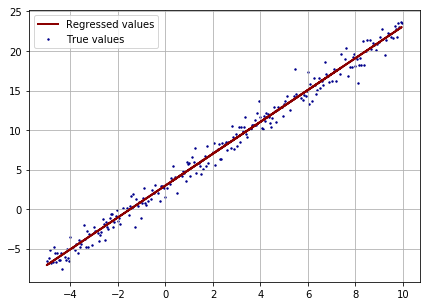

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(7,5))
plt.scatter(x=X_train, y=Y_train, s=2, c='darkblue',label='True values')
plt.plot(X_train, Y_train_hat, c='darkred', linewidth=2, label='Regressed values')
plt.legend()
plt.grid(True)

#### Error distribution

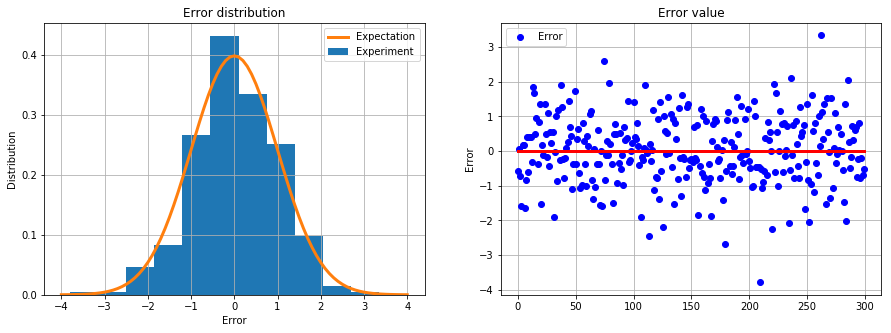

In [53]:
error = linear.predict(X)-Y_true

# The true value of gaussian distribution
xx = np.arange(-4, 4.01, 0.1)
sigma = 1
mu = 0
# gaussian function
yy = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(xx-mu)**2/(2*sigma**2))
# plotting
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(error, bins=11, density=True, label='Experiment')
plt.plot(xx, yy, label='Expectation', linewidth=3)
plt.title('Error distribution')
plt.xlabel('Error')
plt.ylabel('Distribution')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(error, 'bo', label='Error')
plt.plot(np.zeros(error.shape), 'r', linewidth=3)
plt.ylabel('Error')
plt.title('Error value')
plt.legend()
plt.grid(True)
plt.show()

### Conclusion
As we can see from the graphs, the model fits the data very well.